<b style="color:Green;font-size:32px;">Sparks Foundation - Data Science & Analytics Internship!</b><br>
<b style="color:#ff3333;font-size:19px;">#Task_2 - Prediction using Unsupervised ML!</b><br>
<b style="font-size:17px;">Description of the task1:-</b><br>
<ul style="font-size:15px;line-height:18px;"><b><li>From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.<br>
<li>Use R or Python or perform this task</li></b>
 <a>https://github.com/UMMEATHIYA/Student-Percentage-Prediction_Sparks-Foundations</a></li></b>
</ul>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [86]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
df.shape

(150, 5)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [65]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
df1 = pd.read_csv('Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df1["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<b style="color:DarkGreen;font-size:20px;">Scatter Plot</b><br>
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

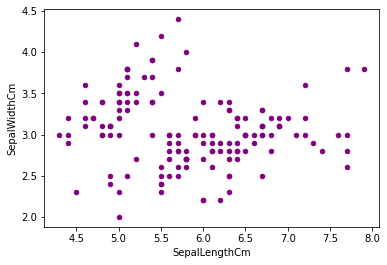

In [103]:
df1.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="purple")

<b style="color:DarkGreen;font-size:20px;">JointPlot</b><br>
Seaborn’s <b>Jointplot</b> displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.<br>
Currently, jointplot wraps JointGrid with the following options for kind:
- scatter - reg - resid - kde - hex
<br>
<li>‘reg’ plots a linear regression line.</li> 

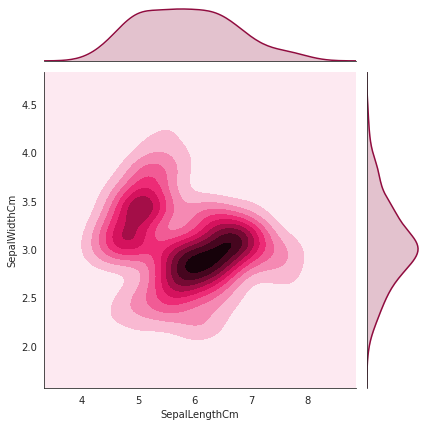

In [104]:
with sns.axes_style('white'):
    sns.jointplot("SepalLengthCm", "SepalWidthCm", df1, kind='kde',color="#900C3F");

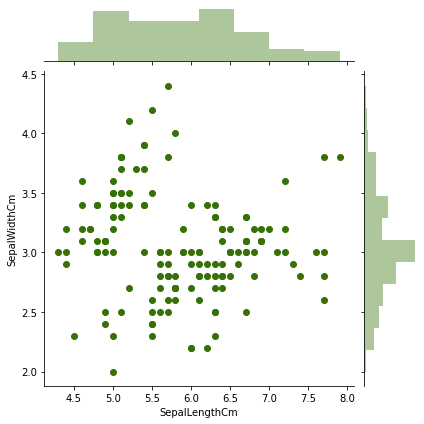

In [106]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df1,color="#357107")

<b style="color:DarkGreen;font-size:20px;">Box Plot</b><br>
Understanding the anatomy of a boxplot by comparing a boxplot against the probability density function for a normal distribution.

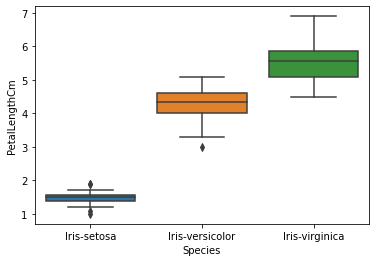

In [107]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df1)

<b style="color:DarkGreen;font-size:20px;">Violin Plot</b><br>
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. <br>Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

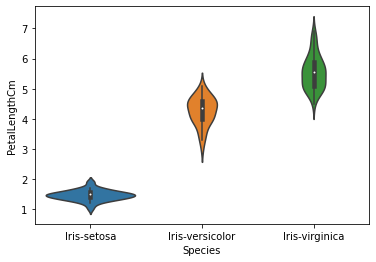

In [109]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df1)

<b style="color:DarkGreen;font-size:20px;">Rel Plot</b><br>
This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

scatterplot() (with kind="scatter"; the default)

lineplot() (with kind="line")

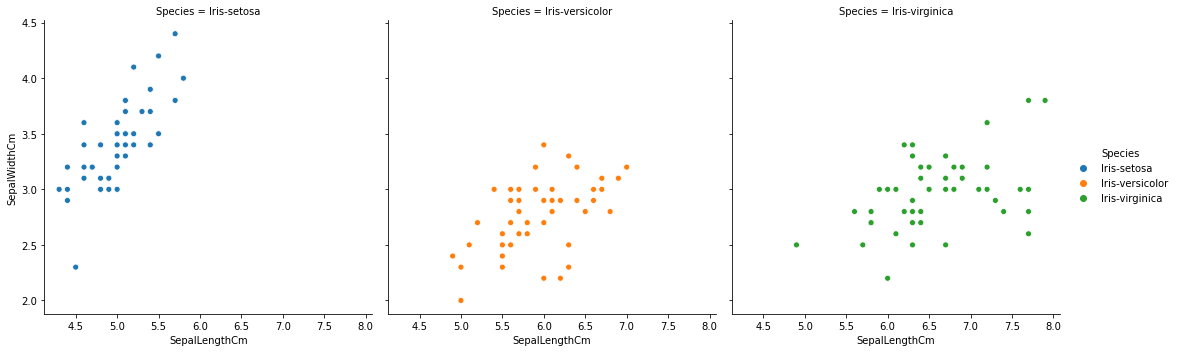

In [110]:
sns.relplot(
    data=df1,
    x="SepalLengthCm", y="SepalWidthCm", col="Species",
    hue="Species",
)

<h2 style="color:green;">API abstraction across visualizations</h2>
There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

The function <b>relplot()</b> is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The <b>relplot()</b> function has a convenient kind parameter that lets you easily switch to this alternate representation:

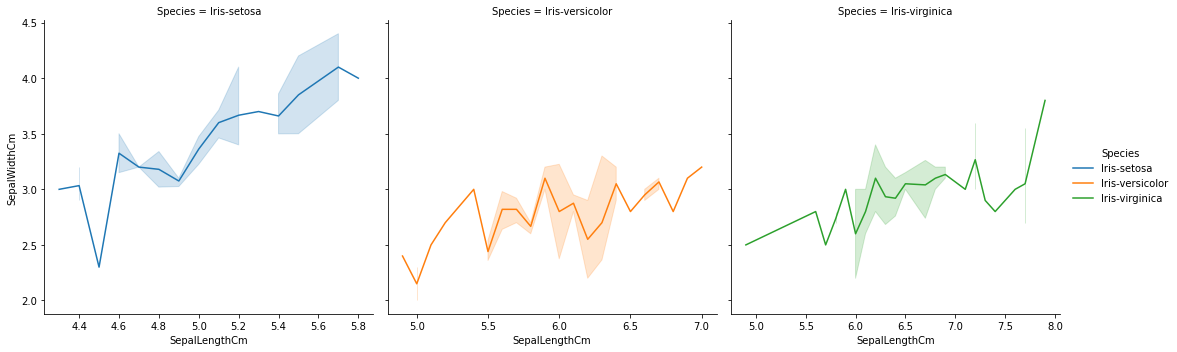

In [111]:
sns.relplot(
    data=df1, kind="line",
    x="SepalLengthCm", y="SepalWidthCm", col="Species",
    hue="Species",
    facet_kws=dict(sharex=False),
)

<h2 style="color:green;">Statistical estimation</h2>
Many seaborn functions will automatically perform the statistical estimation that is necessary to answer the task related questions.

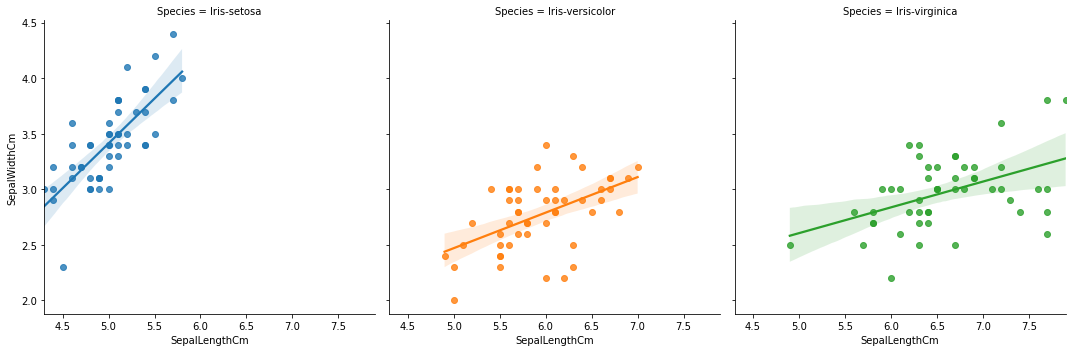

In [112]:
sns.lmplot(data=df1, x="SepalLengthCm", y="SepalWidthCm", col="Species", hue="Species")

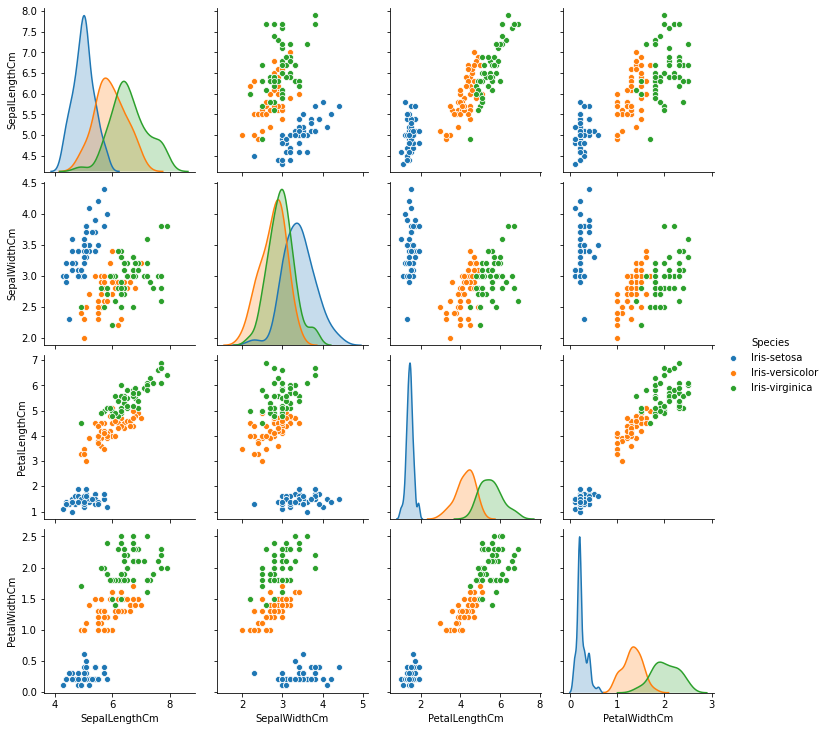

In [113]:
sns.pairplot(df1.drop("Id", axis=1), hue="Species")

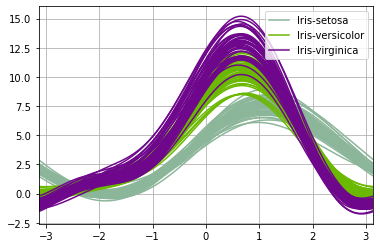

In [114]:
from pandas.plotting import andrews_curves
andrews_curves(df1.drop("Id", axis=1), "Species")

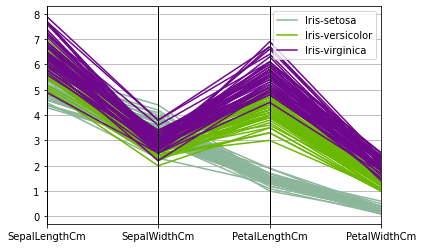

In [115]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df1.drop("Id", axis=1), "Species")

In [116]:
le=LabelEncoder()
df1['Species']=le.fit_transform(df1['Species'])
df1['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [117]:
df1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


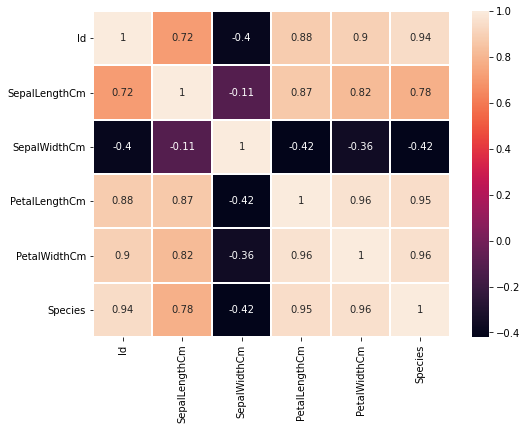

In [118]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),linewidths=1,annot=True)

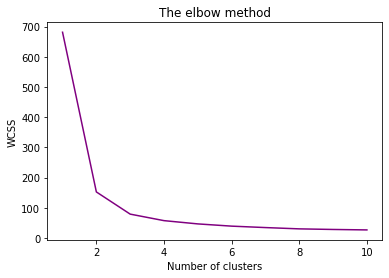

In [89]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss, c="purple")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

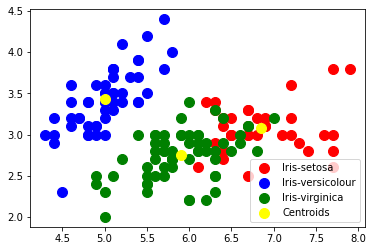

In [91]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();